# Análise Exploratória dos Dados

Neste Notebook iremos realizar investigação detalhada do perfil dos dados, procurando por anomalias que possam dificultar a criação de um modelo de predição. 

Trazendo novamente a descrição de nossas features:
- score_1 a score_10: Representam notas de bureau de crédito (score de crédito) fornecidos pela empresa, usamos para identificar se o comprador é confiável, são dados anonimizados
- pais: Em qual país a compra foi realizada
- produto: Qual tipo de produto que está sendo comprado no e-commerce
- categoria_produto: categoria a qual esse produto se encaixa
- entrega_doc_1 a entrega_doc_3: Documentos que são requisitados no momento de abertura da conta.
- score_fraude_modelo: Score do modelo de predição atual e já implementado pela empresa. É a probabilidade da compra realizada ser uma fraude ou não. Varia de 0 a 100, quanto mais próximo de 100, maior a certeza que a compra é fraude
- fraude: Informação se aquela compra foi fraudulenta ou não. Foi rotulada após alguns dias para conferência do modelo atual.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pycountry_convert as pc


from scipy import stats

In [2]:
df = pd.read_csv("../artifacts/data_ingestion/dados.csv")
df.head()

,score_1,score_2,score_3,score_4,score_5,score_6,pais,score_7,produto,categoria_produto,score_8,score_9,score_10,entrega_doc_1,entrega_doc_2,entrega_doc_3,data_compra,valor_compra,score_fraude_modelo,fraude
0,4,0.7685,94436.24,20.0,0.444828,1.0,BR,5,Máquininha Corta Barba Cabelo Peito Perna Pelo...,cat_8d714cd,0.883598,240.0,102.0,1,NaN,N,2020-03-27 11:51:16,5.64,66,0
1,4,0.7550,9258.50,1.0,0.000000,33.0,BR,0,Avental Descartavel Manga Longa - 50 Un. Tnt ...,cat_64b574b,0.376019,4008.0,0.0,1,Y,N,2020-04-15 19:58:08,124.71,72,0
2,4,0.7455,242549.09,3.0,0.000000,19.0,AR,23,Bicicleta Mountain Fire Bird Rodado 29 Alumini...,cat_e9110c5,0.516368,1779.0,77.0,1,NaN,N,2020-03-25 18:13:38,339.32,95,0
3,4,0.7631,18923.90,50.0,0.482385,18.0,BR,23,Caneta Delineador Carimbo Olho Gatinho Longo 2...,cat_d06e653,0.154036,1704.0,1147.0,1,NaN,Y,2020-04-16 16:03:10,3.54,2,0
4,2,0.7315,5728.68,15.0,0.000000,1.0,BR,2,Resident Evil Operation Raccoon City Ps3,cat_6c4cfdc,0.855798,1025.0,150.0,1,NaN,N,2020-04-02 10:24:45,3.53,76,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   score_1              150000 non-null  int64  
 1   score_2              137016 non-null  float64
 2   score_3              137016 non-null  float64
 3   score_4              149635 non-null  float64
 4   score_5              150000 non-null  float64
 5   score_6              149989 non-null  float64
 6   pais                 149806 non-null  object 
 7   score_7              150000 non-null  int64  
 8   produto              150000 non-null  object 
 9   categoria_produto    150000 non-null  object 
 10  score_8              150000 non-null  float64
 11  score_9              149989 non-null  float64
 12  score_10             149635 non-null  float64
 13  entrega_doc_1        150000 non-null  int64  
 14  entrega_doc_2        41143 non-null   object 
 15  entrega_doc_3    

Em primeiro instante possuimos 14 colunas numéricas e 6 colunas categóricas.

In [4]:
df.describe()

,score_1,score_2,score_3,score_4,score_5,score_6,score_7,score_8,score_9,score_10,entrega_doc_1,valor_compra,score_fraude_modelo,fraude
count,150000.000000,137016.000000,1.370160e+05,149635.000000,150000.000000,149989.000000,150000.000000,150000.000000,149989.000000,149635.000000,150000.000000,150000.000000,150000.000000,150000.000000
mean,3.705407,0.728115,2.604451e+05,21.677669,0.220641,51.169352,14.193513,0.497532,2305.409403,299.969579,0.902353,43.523134,48.066240,0.050000
std,0.753206,0.132943,8.464361e+05,20.062146,2.434995,709.472904,14.161216,0.288348,1712.379601,321.075806,0.296837,91.557888,28.995122,0.217946
min,1.000000,0.000000,1.600000e-01,0.000000,0.000000,-5.000000,0.000000,0.000004,0.000000,0.000000,0.000000,0.020000,0.000000,0.000000
25%,4.000000,0.678400,9.679915e+03,2.000000,0.000000,1.000000,3.000000,0.246819,910.000000,42.000000,1.000000,9.380000,23.000000,0.000000
50%,4.000000,0.755500,4.371165e+04,14.000000,0.104875,8.000000,9.000000,0.495990,1937.000000,193.000000,1.000000,20.610000,48.000000,0.000000
75%,4.000000,0.806500,1.454436e+05,50.000000,0.282938,33.000000,21.000000,0.746508,3445.000000,459.000000,1.000000,40.692500,73.000000,0.000000
max,4.000000,1.000000,1.387874e+07,50.000000,833.333333,145274.000000,58.000000,0.999995,7544.000000,2225.000000,1.000000,3696.350000,100.000000,1.000000


Percebemos uma grande variabilidade em diversas colunas, com desvios padrões acima da média para o `score_3`, `score_5`, `score_6`, `score_10` e `valor_compra`

In [5]:
df.describe(include="O")

,pais,produto,categoria_produto,entrega_doc_2,entrega_doc_3,data_compra
count,149806,150000,150000,41143,150000,150000
unique,51,127804,8324,2,2,145813
top,BR,Fone De Ouvido Sem Fio Xiaomi Airdots Preto,cat_43b9c10,Y,Y,2020-03-19 15:30:23
freq,111628,83,2331,24091,83129,4


Aqui vemos uma grande cardinalidade de valores únicos para a coluna produto e categoria_produto.

Vamos verificar a porcentagem de valores nulos por coluna.

In [6]:
df.isnull().sum() * 100 / len(df)

score_1                 0.000000
score_2                 8.656000
score_3                 8.656000
score_4                 0.243333
score_5                 0.000000
score_6                 0.007333
pais                    0.129333
score_7                 0.000000
produto                 0.000000
categoria_produto       0.000000
score_8                 0.000000
score_9                 0.007333
score_10                0.243333
entrega_doc_1           0.000000
entrega_doc_2          72.571333
entrega_doc_3           0.000000
data_compra             0.000000
valor_compra            0.000000
score_fraude_modelo     0.000000
fraude                  0.000000
dtype: float64

Para a maioria das colunas não temos um valor grande de nulos (<10%), sendo a exceção a coluna de entrega de documentos `entrega_doc_2`, e as colunas `score_2` e `score_3` que apresentam a mesma taxa de nulos de 8.656%. Como os dados são anonimizados não conseguimos falar em primeiro momento o motivo destas colunas possuírem valores ausentes. As demais apresentam proporções abaixo de 1%.  

As colunas `score_4`, `score_6`, `score_9` e `score_10` mesmo apresentando tipo float, apresentam valores que possivelmente são inteiros, ou seja discretos. Vamos verificar se podemos realizar essa suposição.

In [7]:
columns = ["score_4", "score_6", "score_9", "score_10"]

for column in columns:
    print(f"Coluna {column}")

    non_null_column = df[column].dropna()
    # Verifica se podemos transformar as colunas float para inteiros e manter os vetores iguais
    print(np.array_equal(non_null_column, non_null_column.astype(int)))

Coluna score_4
True
Coluna score_6
True
Coluna score_9
True
Coluna score_10
True


Conseguimos visualizar que as colunas podem ser transformadas para inteiros sem erros recebidos, ou seja, mesmo sendo caracterizadas como float, elas representam valores discretos. Vamos usar desta informação para condicionar os gráficos iniciais e verificar se eles são aderentes ao comportamento dos valores.

Iremos tratar inicialmente então com a presença de 4 tipos de variáveis, contínuas, discretas, categóricas e de data.
Podemos verificar se o tratamentos das colunas de score como variáveis discreta representa uma boa abordagem após visualização das distribuições.

Contínuas:`score_2`,`score_3`,`score_5`,`score_8`,`valor_compra`.
Discretas:`score_4`,`score_6`,`score_7`,`score_9`,`score_10`,`score_fraude_modelo`.
Categóricas:`score_1`,`pais`,`produto`,`categoria_produto`,`entrega_doc_1`,`entrega_doc_2`,`entrega_doc_3`,`fraude`
Data:`data_compra`

Como comentado anteriormente, elencar tais diferenças é importante para verificar quais os melhores gráficos a se utilizar para cada variável.

Continuando a análise geral dos dados iremos verificar a quantia de valores únicos para as colunas.

In [8]:
print(df.shape)
df.nunique()

(150000, 20)


score_1                     4
score_2                  7672
score_3                135090
score_4                    51
score_5                 43207
score_6                  1338
pais                       51
score_7                    59
produto                127804
categoria_produto        8324
score_8                149999
score_9                  7297
score_10                 1793
entrega_doc_1               2
entrega_doc_2               2
entrega_doc_3               2
data_compra            145813
valor_compra            17831
score_fraude_modelo       101
fraude                      2
dtype: int64

Devemos acender um alerta para a grande quantia de valores únicos nas colunas de variáveis categóricas, como por exemplo `produto` e `categoria_produto` tendo em vista a grande quantia de diferentes valores, para a amostra e informações atuais do projeto, possivelmente tais variáveis não irão auxiliar em discriminar uma fraude ou não. Em um outro contexto poderiamos verificar as categorias e verificar se há algum nível hierárquico entre elas, agrupando-as em categorias mais descritivas. 

In [9]:
print(df["data_compra"].min())
print(df["data_compra"].max())

2020-03-08 0:02:15
2020-04-21 9:59:33


Os valores de data presente em nossa amostra se encontram em padrão de *timestamp*, podemos realizar transformações para extrair turnos ou dias da semana para verificarmos a existência de correlação entre a variável de saída. Vemos que as informações são do período dos meses de Março e Abril de 2020.

---

## Análise univariada

Nesta seção vamos verificar individualmente por meio de gráficos e testes de hipótese, como as variáveis se comportam em suas distribuições.

In [10]:
sns.set_theme(style="whitegrid", palette="muted")

### Variáveis contínuas



Inicialmente vamos analisar os scores separadamente do valor de compra.

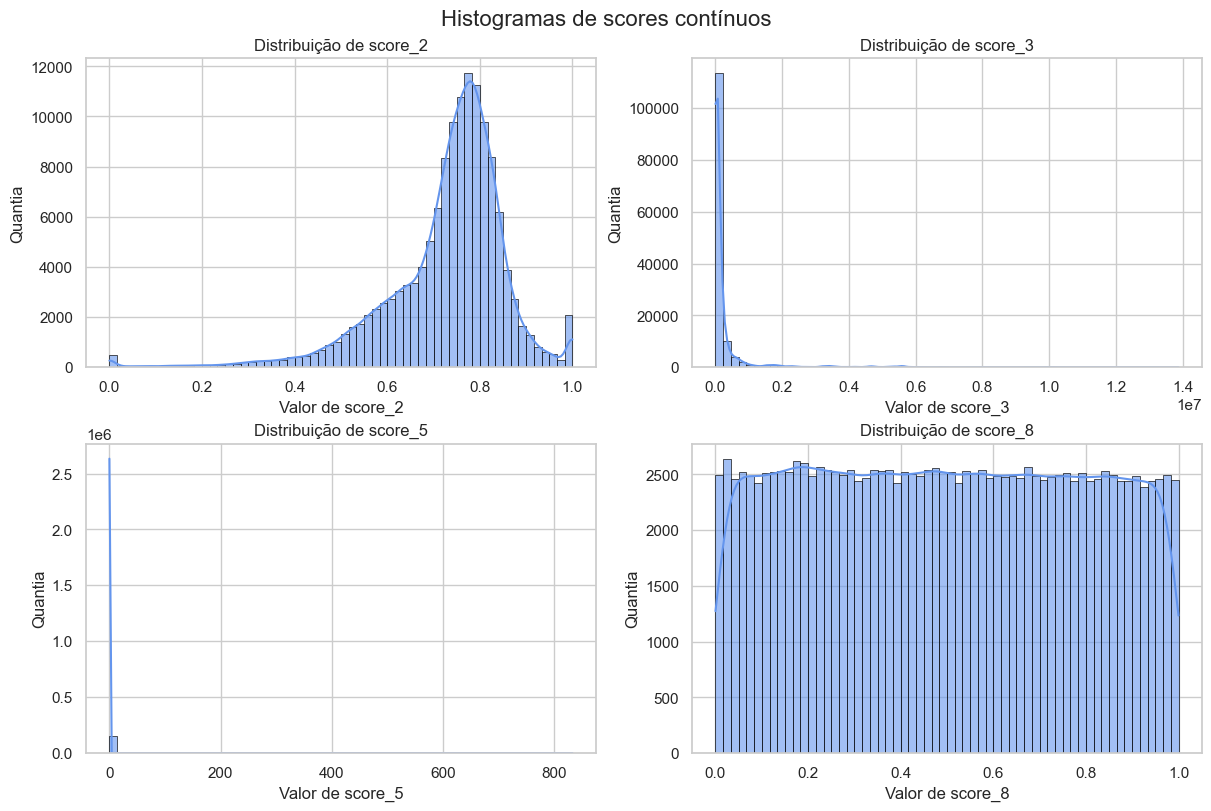

In [11]:
continuous_columns = ["score_2", "score_3", "score_5", "score_8"]

fig, axes = plt.subplots(2, 2, figsize=(12, 8), constrained_layout=True)

for ax, col in zip(axes.flat, df[continuous_columns]):
    sns.histplot(
        df[col],
        kde=True,
        ax=ax,
        color="cornflowerblue",
        bins=60,
        alpha=0.6,
        edgecolor="black",
    )
    ax.set_title(f"Distribuição de {col}")
    ax.set_xlabel(f"Valor de {col}")
    ax.set_ylabel("Quantia")

plt.suptitle("Histogramas de scores contínuos", fontsize=16)
plt.show()

Não conseguimos perceber visualmente uma correlação entre os scores. Os gráficos exceto para o `score_2` apresentam comportamentos excêntricos, além de apresentarem possíveis valores de outlier. 

Vamos começar analisando o `score_8` pela sua particularidade uniforme no gráfico, vamos utilizar um teste de hipótese para verificar se realmente possuímos uma distribuição uniforme.

In [12]:
df["score_8"].value_counts()

score_8
0.560249    2
0.883598    1
0.527253    1
0.931047    1
0.312588    1
           ..
0.986334    1
0.764294    1
0.171627    1
0.610104    1
0.627020    1
Name: count, Length: 149999, dtype: int64

Vamos utilizar uma distribuição uniforme gerada pelo pacote scipy e aplicar um teste Kolmogorov-Smirnov para verificar se a distribuição do `score_8` tem a mesma distribuição dos dados uniformes.

- $H_0$: As distribuições são iguais
- $H_a$: As distribuições são diferentes

O teste KS é um teste não paramétrico para testar se 2 distribuições são iguais.

In [13]:
stats.kstest(df["score_8"], "uniform").pvalue

0.006505043926768705

Assumindo um nível de significância de 5%, temos um p-valor menor que 0.05, ou seja nas condições da amostra podemos **rejeitar** a hipótese nula de que a variável `score_8` segue uma distribuição uniforme. Com isso iremos continuar a utilizá-la em nossa análise.

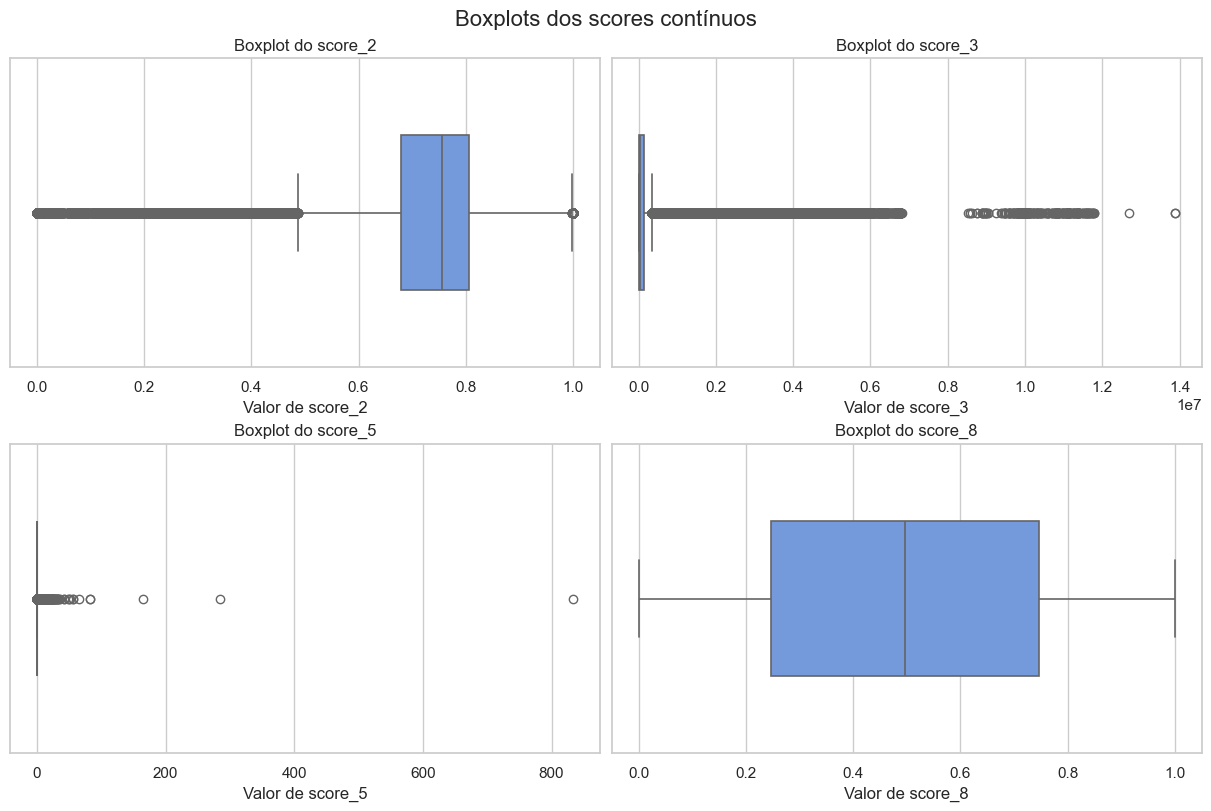

In [14]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8), constrained_layout=True)

for ax, col in zip(axes.flat, df[continuous_columns]):
    sns.boxplot(
        x=df[col],
        ax=ax,
        color="cornflowerblue",
        width=0.5,
        fliersize=6,
        linewidth=1.2,
    )
    ax.set_title(f"Boxplot do {col}")
    ax.set_xlabel(f"Valor de {col}")

plt.suptitle("Boxplots dos scores contínuos", fontsize=16)
plt.show()

A visualização em boxplot não foi de grande auxílio devido ao grande tamanho das caudas das variáveis. A variável que mais se aproxima de uma normal é a de `score_2`, porém ainda possuindo uma grande cauda a esquerda, concentrando sua frequência em valores mais altos.

Vamos tentar aplicar transformações as colunas `score_3` e `score_5` para tentar melhorar a visulização.

**Atenção**: A partir deste ponto iremos utilizar um dataframe de cópia para evitar alterar os valores originais da amostra, garantindo corretude nas operações caso sejam realizadas novamente.

In [15]:
df_copy = df.copy()

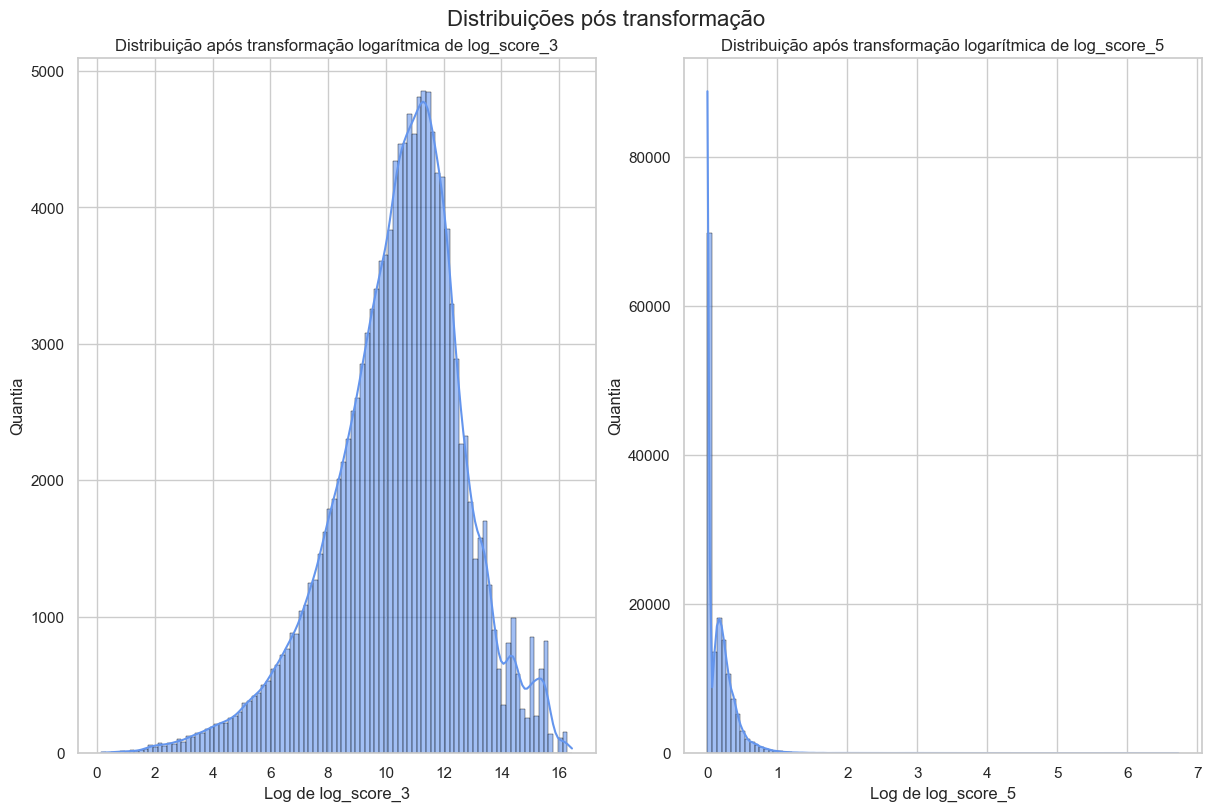

In [16]:
# Aplicando transformação log
df_copy["log_score_3"] = np.log1p(df["score_3"])
df_copy["log_score_5"] = np.log1p(df["score_5"])

fig, axes = plt.subplots(1, 2, figsize=(12, 8), constrained_layout=True)

for ax, col in zip(axes.flat, df_copy[["log_score_3", "log_score_5"]]):
    sns.histplot(
        df_copy[col],
        kde=True,
        ax=ax,
        color="cornflowerblue",
        bins=100,
        alpha=0.6,
        edgecolor="black",
    )
    ax.set_title(f"Distribuição após transformação logarítmica de {col}")
    ax.set_xlabel(f"Log de {col}")
    ax.set_ylabel("Quantia")

plt.suptitle("Distribuições pós transformação", fontsize=16)
plt.show()

In [17]:
score_5_sem_outliers = df[df["score_5"] <= 10]["score_5"]
df_copy["score_5_sem_outliers"] = score_5_sem_outliers

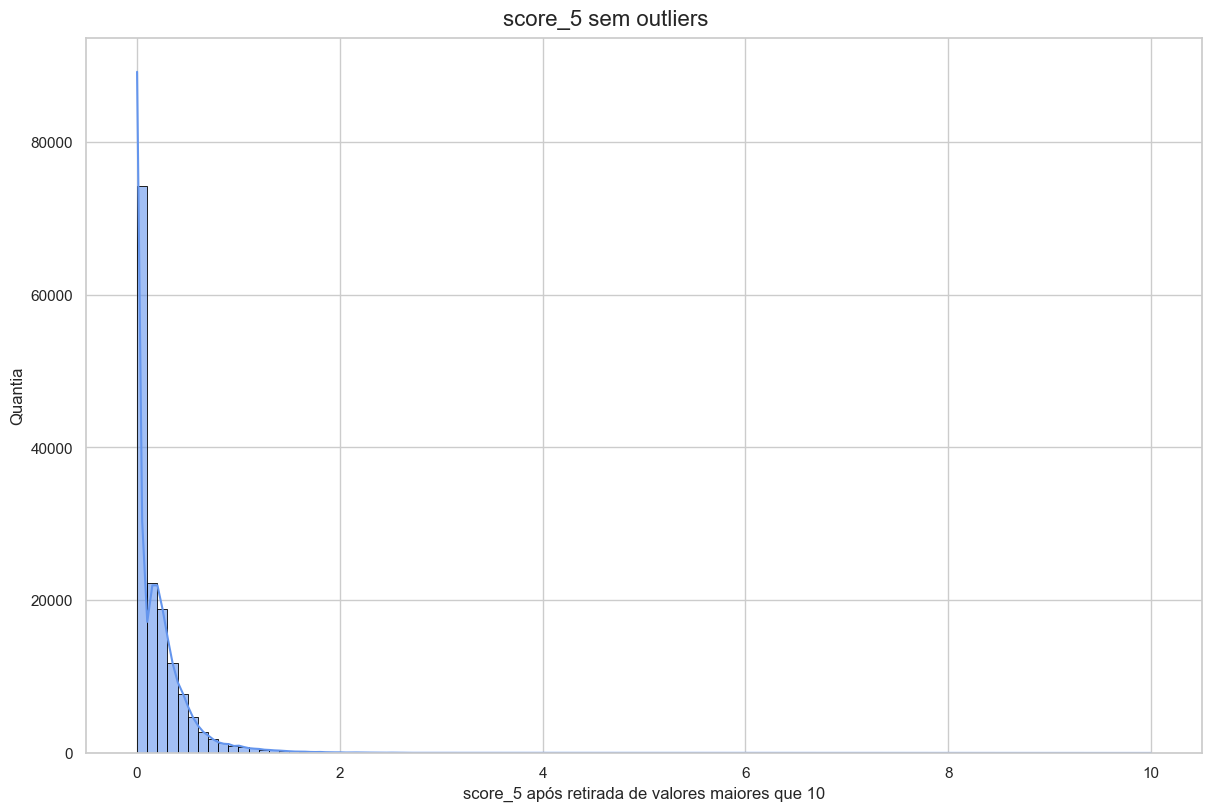

In [18]:
fig = plt.figure(figsize=(12, 8), constrained_layout=True)

sns.histplot(
    score_5_sem_outliers,
    kde=True,
    color="cornflowerblue",
    bins=100,
    alpha=0.6,
    edgecolor="black",
)
plt.xlabel(f"score_5 após retirada de valores maiores que 10")
plt.ylabel("Quantia")

plt.suptitle("score_5 sem outliers", fontsize=16)
plt.show()

In [19]:
score_5_sem_outliers.shape[0] / df.shape[0]

0.9993266666666667

In [20]:
df[df["score_5"] == 0].shape[0] / df.shape[0]

0.4337

Temos que 99,9% dos dados de score_5 estão abaixo de 10, em que 43% dos valores são 0s, isso pode ser carregado para posterior análise para verificarmos se ter um score_5 zerado influencia ou não o aumento de fraudes.

Aplicando o log vemos uma melhoria substancial na visualização da variável `score_3`, onde podemos identificar agora a relação das frequências com um intervalo de valores menor para a distribuição. Vamos tentar aplicar outra transformação a variável `score_5` e ver como ela se comporta.

In [21]:
df_copy["boxcox_score_5"], _ = stats.boxcox(
    df["score_5"] + 1
)  # Adição de 1 para evitar 0

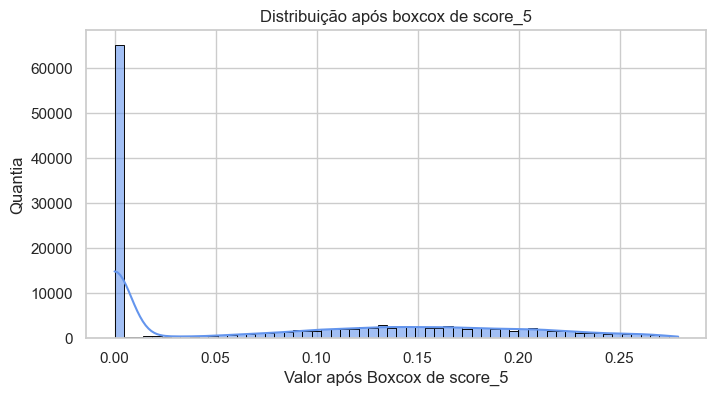

In [22]:
plt.figure(figsize=(8, 4))

sns.histplot(
    df_copy["boxcox_score_5"],
    kde=True,
    color="cornflowerblue",
    bins=60,
    alpha=0.6,
    edgecolor="black",
)

plt.xlabel("Valor após Boxcox de score_5")
plt.ylabel("Quantia")
plt.title("Distribuição após boxcox de score_5", fontsize=12)
plt.show()

Ainda vemos uma dificuldade na interpretação da variável `score_5`, porém conseguimos ver claramente a concentração de parte da porcentagem dos valores em 0.

Vamos analisar agora individualmente a variável `valor_compra`.

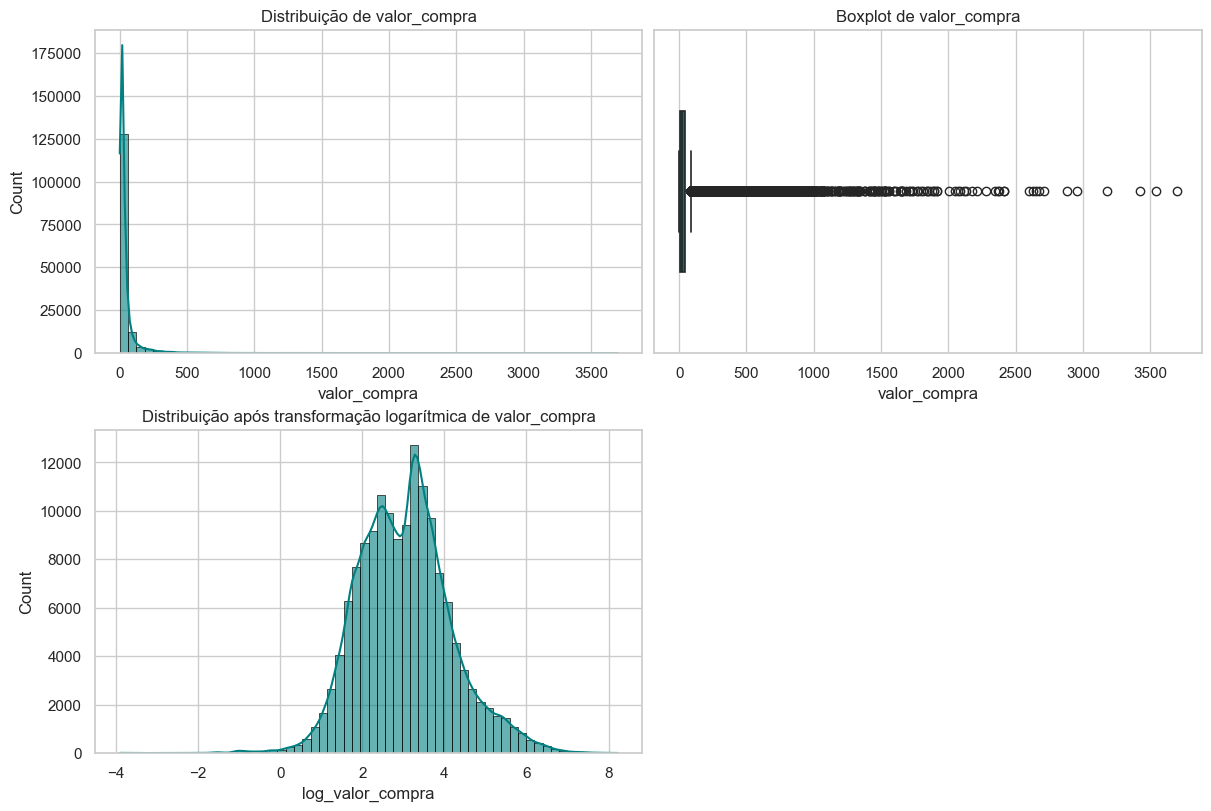

In [23]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8), constrained_layout=True)

color = "teal"

sns.histplot(
    df["valor_compra"],
    kde=True,
    ax=axes[0][0],
    color=color,
    bins=60,
    alpha=0.6,
    edgecolor="black",
)

sns.boxplot(
    x=df["valor_compra"],
    ax=axes[0][1],
    color=color,
    width=0.5,
    fliersize=6,
    linewidth=1.2,
)

df_copy["log_valor_compra"] = np.log(df["valor_compra"])
sns.histplot(
    df_copy["log_valor_compra"],
    kde=True,
    ax=axes[1][0],
    color=color,
    bins=60,
    alpha=0.6,
    edgecolor="black",
)

titles = [
    "Distribuição de valor_compra",
    "Boxplot de valor_compra",
    "Distribuição após transformação logarítmica de valor_compra",
]

for ax, title in zip([axes[0, 0], axes[0, 1], axes[1, 0]], titles):
    ax.set_title(title, fontsize=12)

axes[1, 1].axis("off")

# plt.suptitle("Distribuições de valor_compra", fontsize=16)
plt.show()

Para os valores de compra temos uma grande concentração em valores menores, o que acompanha o senso comum tendo em vista a facilidade de comprar produtos com menores custos. Aqui surge a possibilidade de criarmos restrições ou agrupamentos de valores de compra que possam caracterizar o perfil de fraude.

Ao aplicarmos a transformação logarítimica percebemos uma aproximação visual a uma curva normal da frequência dos valores. 

### Variáveis discretas


Iremos agora analisar as variáveis discretas identificadas.
Sendo elas: `score_4`,`score_6`,`score_7`,`score_9`,`score_10`

Vamos retirar a variável `score_fraude_modelo` da análise, tendo em vista que não iremos utilizá-la para a criação do modelo.


In [24]:
columns = ["score_4", "score_6", "score_7", "score_9", "score_10"]

df[columns].describe()

,score_4,score_6,score_7,score_9,score_10
count,149635.000000,149989.000000,150000.000000,149989.000000,149635.000000
mean,21.677669,51.169352,14.193513,2305.409403,299.969579
std,20.062146,709.472904,14.161216,1712.379601,321.075806
min,0.000000,-5.000000,0.000000,0.000000,0.000000
25%,2.000000,1.000000,3.000000,910.000000,42.000000
50%,14.000000,8.000000,9.000000,1937.000000,193.000000
75%,50.000000,33.000000,21.000000,3445.000000,459.000000
max,50.000000,145274.000000,58.000000,7544.000000,2225.000000


In [25]:
df[columns].nunique()

score_4       51
score_6     1338
score_7       59
score_9     7297
score_10    1793
dtype: int64

Aqui devemos nos atentar a quantia de valores únicos que cada variável pode assumir, sendo que os gráficos de barra só serão de interesse para análise para os valores de `score_4` e `score_7`

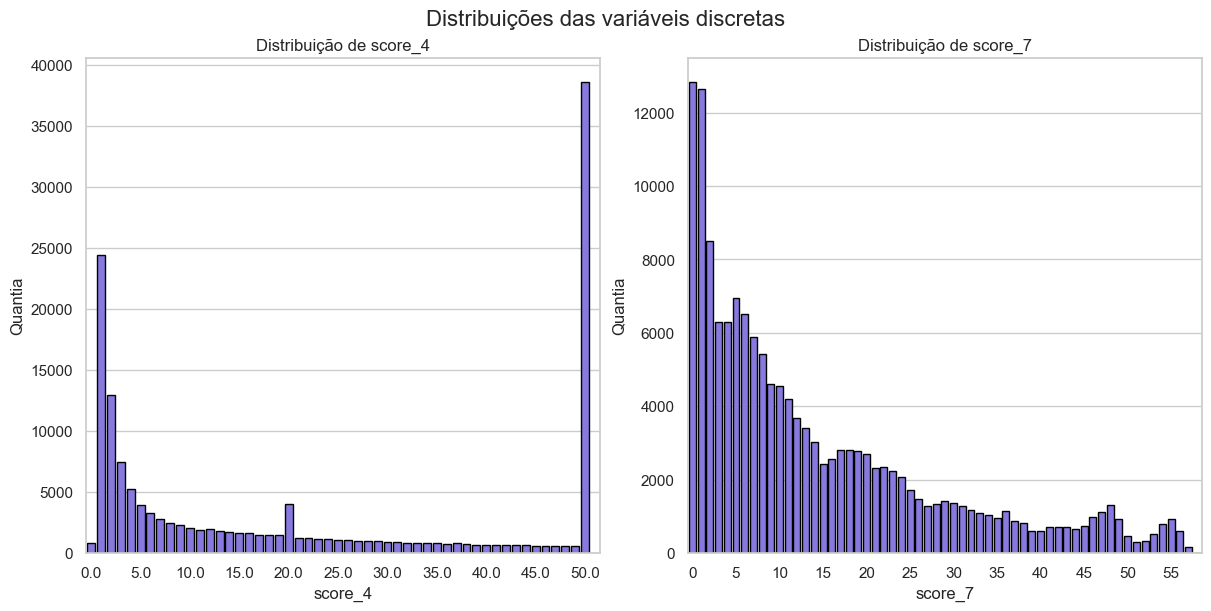

In [26]:
low_options_columns = ["score_4", "score_7"]

fig, axes = plt.subplots(1, 2, figsize=(12, 6), constrained_layout=True)

for ax, col in zip(axes.flat, df[low_options_columns]):
    sns.countplot(
        x=df[col],
        ax=ax,
        color="mediumslateblue",
        edgecolor="black",
    )

    ax.set_xticks(range(0, len(df[col].unique()), 5))
    ax.set_xlim(-0.5, len(df[col].unique()) - 0.5)
    ax.set_ylabel("Quantia")
    ax.set_title(f"Distribuição de {col}")


plt.suptitle("Distribuições das variáveis discretas", fontsize=16)
plt.show()

O `score_4` apresenta um comportamento interessante, há uma grande quantia de valores muito pequenos, porém há uma grande quantia de valores muito grandes, resultando em dois picos nas pontas do gráfico.

O `score_7` apresenta uma assimetria concentrando-se em valores menores e decaindo a frequência conforme o score aumenta.

Para as demais utilizaremos o boxplot.

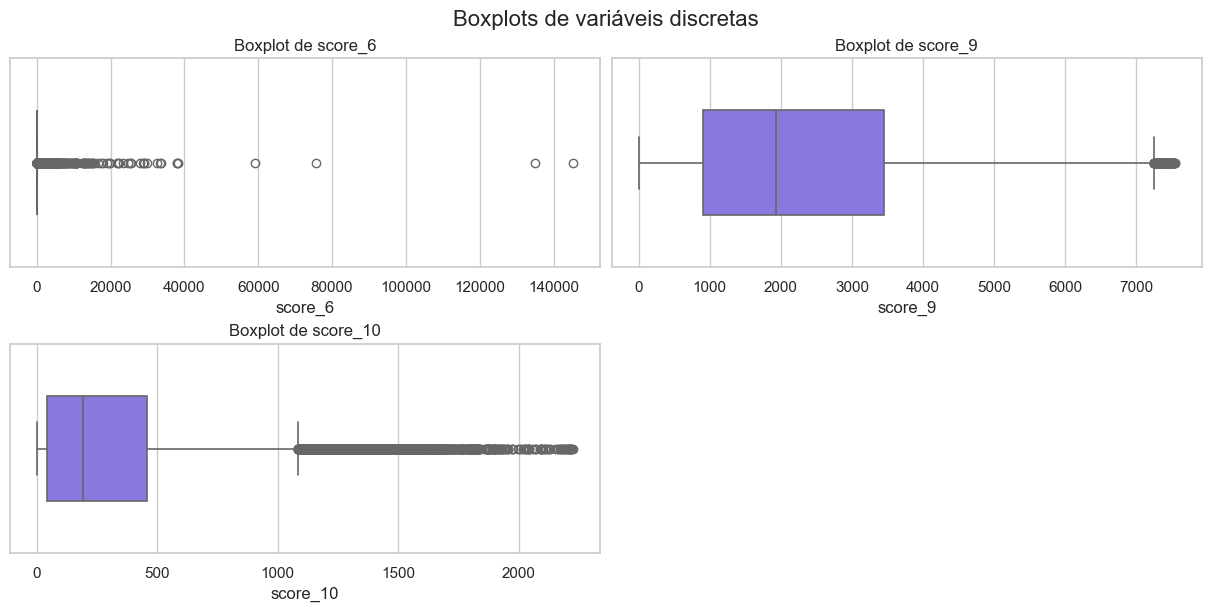

In [27]:
high_options_columns = ["score_6", "score_9", "score_10"]

fig, axes = plt.subplots(2, 2, figsize=(12, 6), constrained_layout=True)

for ax, col in zip(axes.flat, df[high_options_columns]):
    sns.boxplot(
        x=df[col],
        ax=ax,
        color="mediumslateblue",
        width=0.5,
        fliersize=6,
        linewidth=1.2,
    )

    ax.set_title(f"Boxplot de {col}")

axes[1, 1].axis("off")
plt.suptitle("Boxplots de variáveis discretas", fontsize=16)
plt.show()

Percebemos novamente uma assimetria dos dados de score, em que a grande quantia de valores se encontram em resultados mais baixos. A grande quantia de categorias e grande variabilidade dos números apresentados nessas colunas de score levanta a sugestão de **voltarmos a tratá-las em conjunto com os scores contínuos**, tendo em vista que a abordagem discreta pode ter decorrido de uma ausência de precisão na coleta dos valores.

Vamos então apresentá-las em histogramas e verificar suas distribuições.

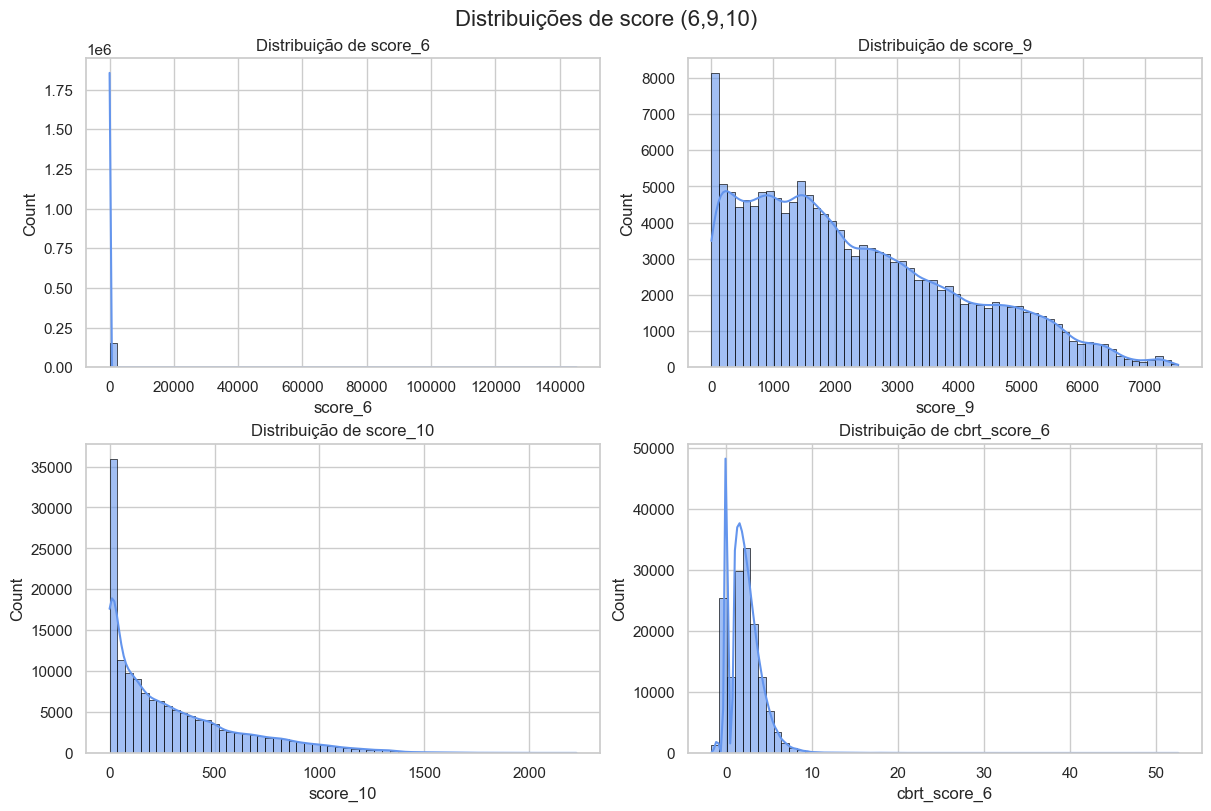

In [28]:
high_options_columns = ["score_6", "score_9", "score_10"]

df_copy["cbrt_score_6"] = np.cbrt(df["score_6"])

fig, axes = plt.subplots(2, 2, figsize=(12, 8), constrained_layout=True)

for ax, col in zip(
    axes.flat, df_copy[["score_6", "score_9", "score_10", "cbrt_score_6"]]
):
    sns.histplot(
        df_copy[col],
        kde=True,
        ax=ax,
        color="cornflowerblue",
        bins=60,
        alpha=0.6,
        edgecolor="black",
    )
    ax.set_title(f"Distribuição de {col}")

plt.suptitle("Distribuições de score (6,9,10)", fontsize=16)
plt.show()

Percebemos que os scores 9 e 10 são de fácil visibilidade e apresentam comportamento semelhante a uma distribuição exponencial, decaindo ao longo do aumento do valor do score.

Aplicamos uma transformação cúbica ao `score_6` para tentarmos uma melhoria e aproximação a normal, o gráfico se tornou mais visível mas ainda apresenta uma forte assimetria a direita.

In [29]:
df["score_6"].quantile(0.99)

483.0

Vemos que para o `score_6` os valores até 483 representam 99% dos dados.

In [30]:
score_6_sem_outliers = df[df["score_6"] < 483]["score_6"]
df_copy["score_6_sem_outliers"] = score_6_sem_outliers

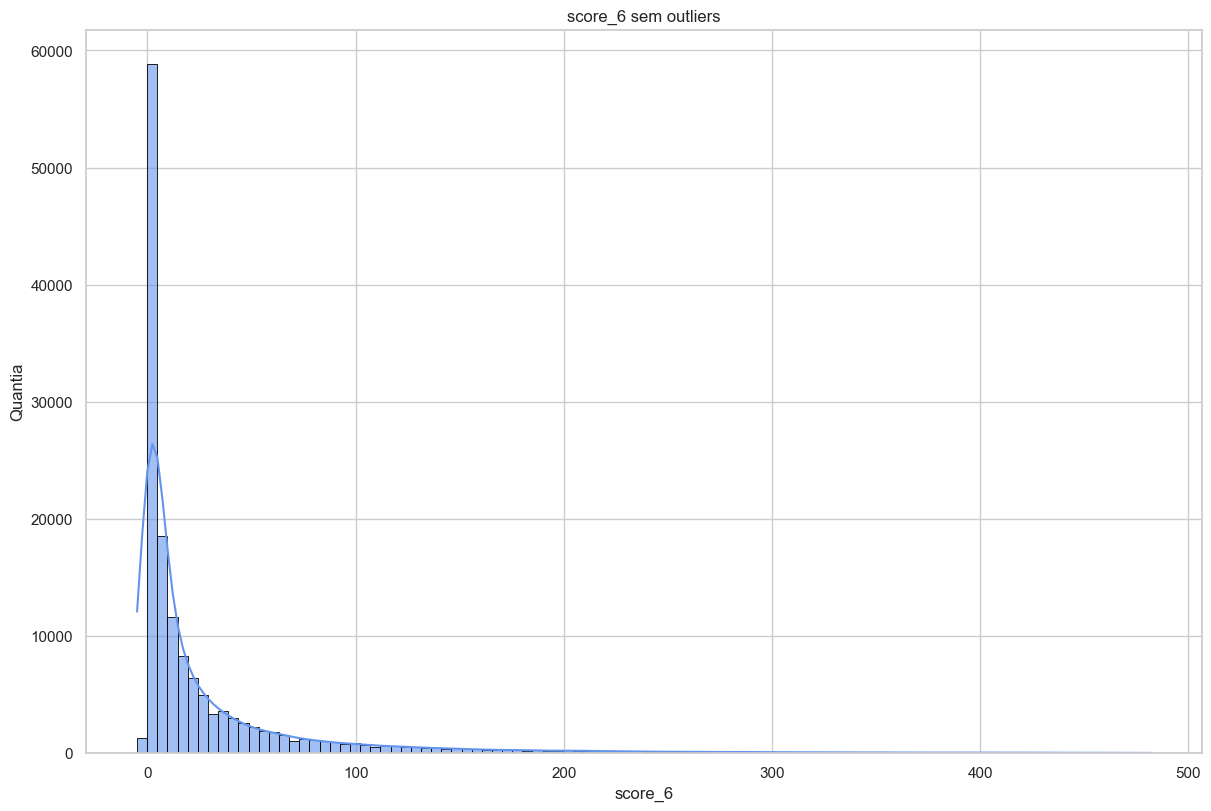

In [31]:
fig = plt.figure(figsize=(12, 8), constrained_layout=True)

sns.histplot(
    score_6_sem_outliers,
    kde=True,
    color="cornflowerblue",
    bins=100,
    alpha=0.6,
    edgecolor="black",
)
plt.title("score_6 sem outliers")
plt.ylabel("Quantia")
plt.show()

Conseguimos ver mais claramente o comportamento do score_6 sem a presença dos valores altíssimos acima de 483. Percebemos também a presença de poucos valores abaixo de 0.

### Variáveis categóricas

Temos como variáveis categóricas as seguintes colunas:
- `score_1`,`pais`,`produto`,`categoria_produto`,`entrega_doc_1`,`entrega_doc_2`,`entrega_doc_3`,`fraude`

Iremos analisá-las separadamente, recobrando que, `produto` e `categoria_produto` apresentam uma quantidade de possíveis valores muito grandes e distintos entre si, apresentando uma dificuldade de análise, tendo em vista que precisariamos ou de acessar dados da hierarquia a qual os produtos se referem, ou aplicar técnicas de NLP para uma análise avançada e com maior profundidade.

Iremos excluir a variável `fraude` da análise univariada por ela ser nossa variável de saída.

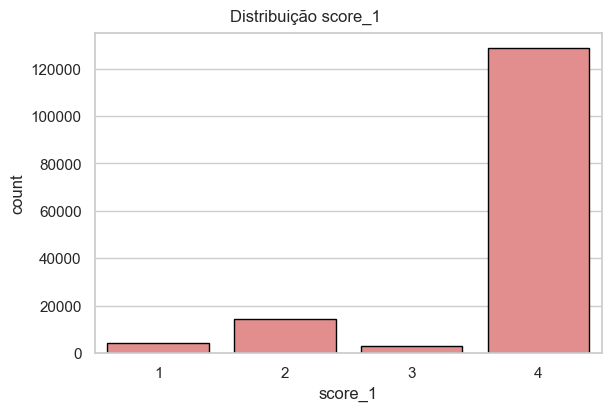

In [32]:
fig = plt.figure(figsize=(6, 4), constrained_layout=True)

sns.countplot(
    x=df["score_1"],
    color="lightcoral",
    edgecolor="black",
)

plt.suptitle("Distribuição score_1", fontsize=12)
plt.show()

Grande parte dos valores de `score_1` pertencem a classe 4.

Vamos verificar como a coluna pais se comporta em termos de porcentagem de transação.

In [33]:
(df["pais"].value_counts() / df["pais"].shape) * 100

pais
BR    74.418667
AR    21.309333
UY     1.978000
US     1.515333
SE     0.238667
MX     0.157333
RU     0.048667
ES     0.046000
CO     0.042667
GB     0.028667
FR     0.012000
IT     0.009333
PT     0.008667
DE     0.006000
CL     0.006000
PE     0.003333
EC     0.002667
PY     0.002667
AU     0.002000
PA     0.002000
CA     0.002000
UA     0.002000
BE     0.002000
CN     0.002000
CH     0.002000
NZ     0.002000
PR     0.001333
NL     0.001333
BO     0.001333
CR     0.001333
AE     0.001333
LB     0.001333
FI     0.000667
TW     0.000667
NO     0.000667
EG     0.000667
IL     0.000667
PH     0.000667
JP     0.000667
GH     0.000667
NI     0.000667
DO     0.000667
BS     0.000667
TR     0.000667
IN     0.000667
GR     0.000667
HN     0.000667
KR     0.000667
GE     0.000667
AD     0.000667
ZA     0.000667
Name: count, dtype: float64

Aproximadamente 75% das transações da amostra são centradas no Brasil, percebemos que muitos países apresentam uma porcentagem menor que 0.05% das transações, poderiamos agrupar tais países em um grupo outros. Porém para este projeto iremos criar coluna de continente, referente ao país.

Vamos utilizar a biblioteca `pycountry-convert` para transformar os países em continentes e verificarmos o comportamento.

In [34]:
df["pais"].notnull().sum()

149806

In [35]:
df_copy["continente"] = df.loc[df["pais"].notnull()]["pais"].apply(
    lambda x: pc.country_alpha2_to_continent_code(x)
)

In [36]:
df_copy["continente"].value_counts() / df_copy["continente"].shape * 100

continente
SA    97.764667
NA     1.682000
EU     0.408000
AS     0.010000
OC     0.004000
AF     0.002000
Name: count, dtype: float64

98% das transações são realizadas na América do Sul.

Vamos verificar agora a entrega de documentos. Para este projeto temos a informação que os valores nulos dessa coluna são caracterizados como não entregue. Vamos realizar o preenchimento neste momento para melhor representação dos gráficos.

In [37]:
deliver_columns = [
    "entrega_doc_1",
    "entrega_doc_2",
    "entrega_doc_3",
]

df[deliver_columns].isna().sum()

entrega_doc_1         0
entrega_doc_2    108857
entrega_doc_3         0
dtype: int64

In [38]:
df_copy[deliver_columns] = df[deliver_columns].fillna("N")

In [39]:
df_copy["entrega_doc_2"].value_counts()

entrega_doc_2
N    125909
Y     24091
Name: count, dtype: int64

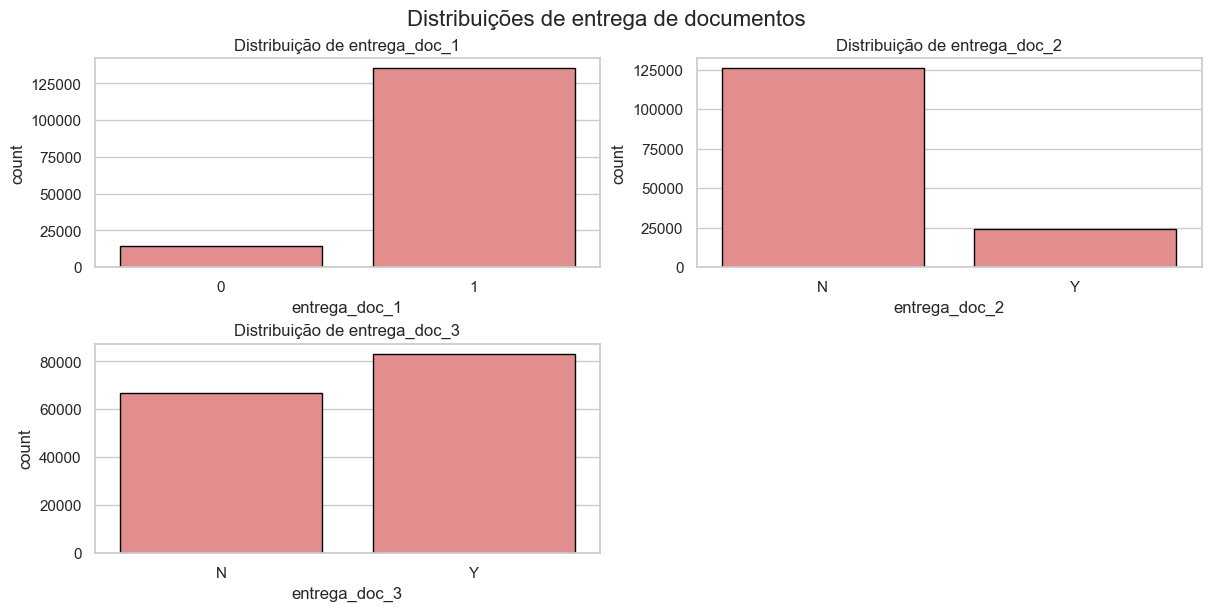

In [40]:
fig, axes = plt.subplots(2, 2, figsize=(12, 6), constrained_layout=True)

for ax, col in zip(axes.flat, df_copy[deliver_columns]):
    sns.countplot(
        x=df_copy[col],
        ax=ax,
        color="lightcoral",
        edgecolor="black",
    )

    ax.set_title(f"Distribuição de {col}")

axes[1, 1].axis("off")

plt.suptitle("Distribuições de entrega de documentos", fontsize=16)
plt.show()

Visualizamos uma grande porcentagem de entregas do documento 1, uma grande falta do documento 2 e uma entrega equivalente para o documento 3 com predominância para o caso positivo.

Para as variáveis de `produto`, `categoria_produto` devido a alta cardinalidade, vamos verificar se há registros que concentram a maior quantidade de compras. Para categoria vamos utilizar um threshold para manter registros que aparecem ao menos 3 vezes, de forma empírica.

In [41]:
df["produto"].value_counts()

produto
Fone De Ouvido Sem Fio Xiaomi Airdots Preto                     83
Xiaomi Redmi Note 8 Dual Sim 64 Gb Azul-netuno 4 Gb Ram         51
Clean Sept - Álcool Em Gel 70% 500 Ml                           49
Tapete Ilustrativo Pista Carrinho Hot Wheels 0,60x1,20m         47
Máscara Descartável Tripla Com Elástico Proteção Anvisa 50un    47
                                                                ..
Bateria Zetta, Nova, Com Nota Fiscal, 12 Mês De Garantia         1
Dispenser Jabón Liquido / Alcohol En Gel X Unidad                1
Moletom Gola Redonda Shawn Mendes Top 98 Unissex Promoção        1
Placa Interface Adesivo Lavadora Brastemp Bwl11 Emicol Biv.      1
A Magia Divina Das Velas. O Livro Das Sete Chamas Sagradas       1
Name: count, Length: 127804, dtype: int64

In [42]:
frequentes = df["categoria_produto"].value_counts()
categorias_validas = frequentes[frequentes > 2].index

df_copy["categoria_produto_reduzida"] = df["categoria_produto"]
df_copy.loc[
    ~df_copy["categoria_produto"].isin(categorias_validas),
    "categoria_produto_reduzida",
] = "Outros"

In [43]:
df_copy["categoria_produto_reduzida"].value_counts()

categoria_produto_reduzida
Outros         4556
cat_43b9c10    2331
cat_d69bed9    1799
cat_604df77    1784
cat_6c4cfdc    1449
               ... 
cat_8f83e72       3
cat_bcbccaa       3
cat_228b582       3
cat_ddd4cc6       3
cat_3dbd9e6       3
Name: count, Length: 4918, dtype: int64

Verificamos que a quantidade de registros que foram classificados como outros é muito grande. Podemos aplicar algum enconding a coluna de categoria_produto após essa transformação, se torna válido também testarmos a aderência dessa coluna ao modelo nos resultados, testando com ou sem a adição.

### Variável Data

Para a variável data vamos utilizar de manipulações transformando-a em dias e horas, para verificar o comportamento de compra para esta amostra.

In [44]:
df["data_compra"].dtype

dtype('O')

In [45]:
df_copy["data_compra"] = pd.to_datetime(df["data_compra"])

In [46]:
df_copy["hora_compra"] = df_copy["data_compra"].dt.hour
df_copy["hora_compra"].head()

0    11
1    19
2    18
3    16
4    10
Name: hora_compra, dtype: int32

In [47]:
sales_per_hour = df_copy["hora_compra"].value_counts()
sales_per_hour = sales_per_hour.reset_index().sort_values("hora_compra")

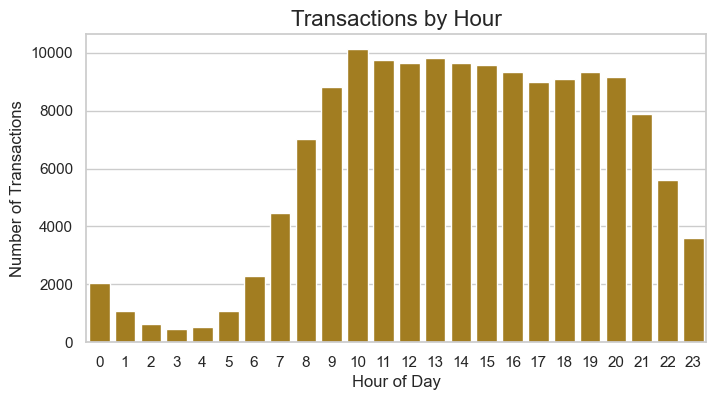

In [48]:
plt.figure(figsize=(8, 4))
sns.barplot(
    data=sales_per_hour, x="hora_compra", y="count", color="darkgoldenrod"
)
plt.title("Transactions by Hour", fontsize=16)
plt.xlabel("Hour of Day", fontsize=12)
plt.ylabel("Number of Transactions", fontsize=12)
plt.xticks(range(0, 24))
plt.show()

Temos que a quantia de compras segue uma proporção pautada no comportamento real, em horário útil a quantia de compras é muito maior do que o período da madrugada.

In [49]:
df_copy["dia_semana"] = df_copy["data_compra"].dt.dayofweek

sales_per_day_of_week = df_copy["dia_semana"].value_counts()
sales_per_day_of_week = sales_per_day_of_week.reset_index().sort_values(
    "dia_semana"
)

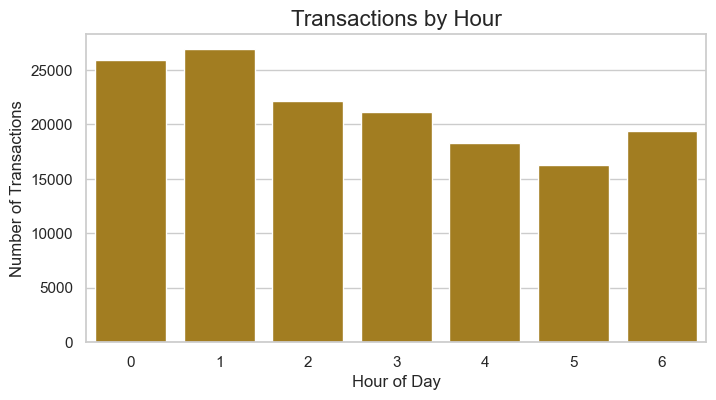

In [50]:
plt.figure(figsize=(8, 4))
sns.barplot(
    data=sales_per_day_of_week,
    x="dia_semana",
    y="count",
    color="darkgoldenrod",
)
plt.title("Transactions by Hour", fontsize=16)
plt.xlabel("Hour of Day", fontsize=12)
plt.ylabel("Number of Transactions", fontsize=12)
plt.xticks(range(0, 7))
plt.show()

Temos uma predominância de compras realizadas na segunda, decaindo durante a semana com a menor taxa sendo atingida no sábado.

## Análise Bivariada

Nesta seção iremos verificar a correlação das variáveis entre si e como elas se correlacionam com a variável fraude.

Vamos levantar algumas hipóteses a serem atacadas:
- Como valores de score se relacionam com a variável fraude?
- Conseguimos identificar alguma relação das distribuições de tempo com os casos de fraude?
- Há uma relação entre os valores de entrega de documentos com a variável fraude?
- Como o país ou continente se relaciona com os casos?

### Variáveis Numéricas

Vamos analisar a correlação das variáveis numéricas entre si.

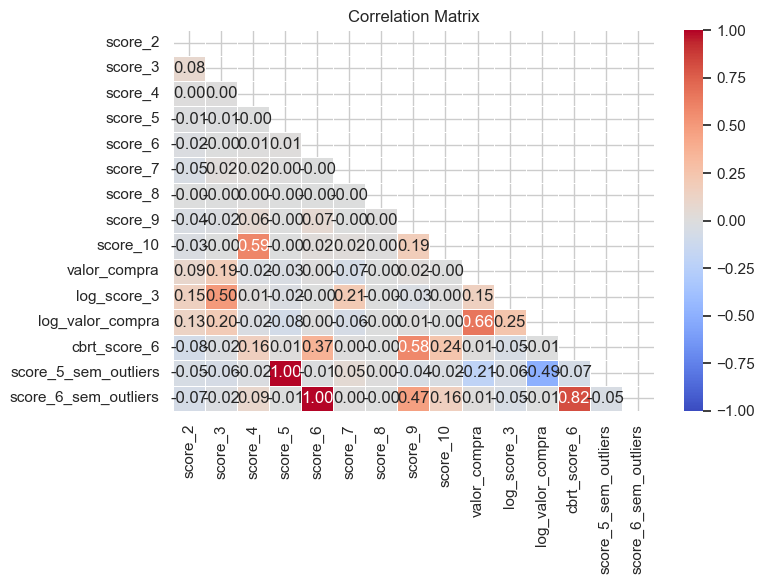

In [51]:
numeric_columns = [
    "score_2",
    "score_3",
    "score_4",
    "score_5",
    "score_6",
    "score_7",
    "score_8",
    "score_9",
    "score_10",
    "valor_compra",
    "log_score_3",
    "log_valor_compra",
    "cbrt_score_6",
    "score_5_sem_outliers",
    "score_6_sem_outliers",
]
corr_matrix = df_copy[numeric_columns].corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
plt.figure(figsize=(8, 6))
sns.heatmap(
    corr_matrix,
    mask=mask,
    annot=True,
    cmap="coolwarm",
    fmt=".2f",
    linewidths=0.5,
    vmin=-1,
    vmax=1,
)
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

Percebemos correlações das variáveis com suas próprias transformações e uma correlação média entre `score_4` e `score_10`. Uma correlação interessante também é da coluna transformada de `score_6` com `score_9`, porém também não pode ser considerada como uma correlação forte. 

Vamos analisar como as variáveis numéricas se comportam relativo aos casos de fraude e não fraude.

In [52]:
fraud_sales = df_copy[df_copy["fraude"] == 1]
non_fraud_sales = df_copy[df_copy["fraude"] == 0]

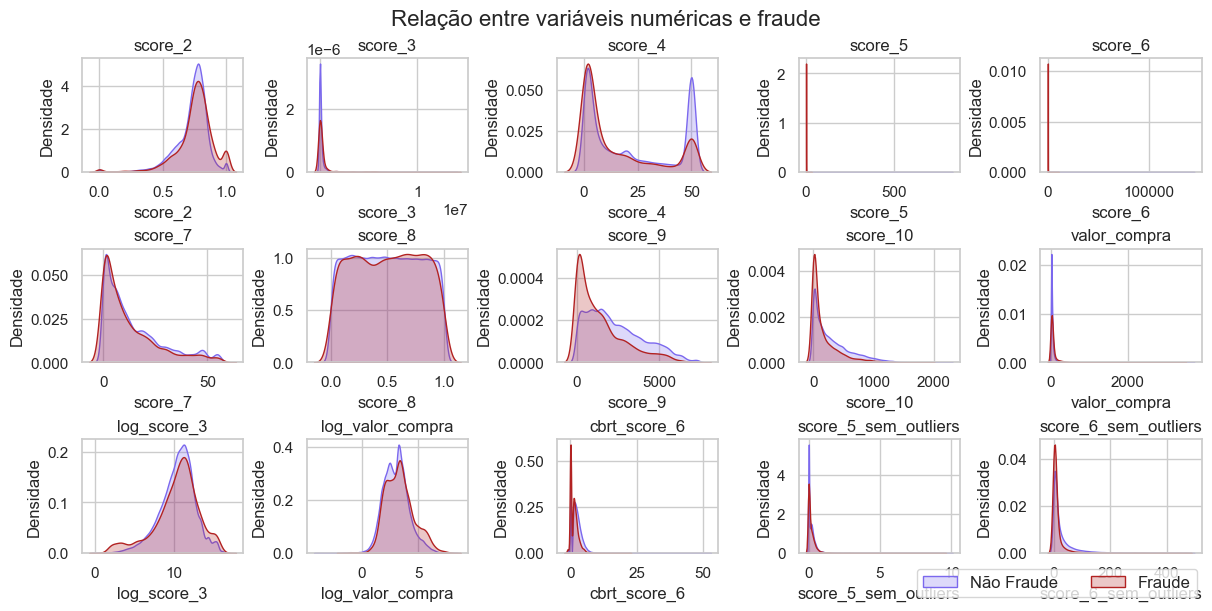

In [53]:
fig, axes = plt.subplots(3, 5, figsize=(12, 6), constrained_layout=True)

for ax, col in zip(axes.flat, df_copy[numeric_columns]):
    sns.kdeplot(
        non_fraud_sales[col],
        label="Não Fraude",
        fill=True,
        color="mediumslateblue",
        ax=ax,
    )
    sns.kdeplot(
        fraud_sales[col], label="Fraude", fill=True, color="firebrick", ax=ax
    )

    ax.set_title(f"{col}")
    ax.set_xlabel(col)
    ax.set_ylabel("Densidade")
    # ax.legend()

fig.legend(
    labels=["Não Fraude", "Fraude"],
    loc="lower right",
    fontsize=12,
    ncol=2,
    bbox_to_anchor=(1, 0),
    frameon=True,
)

plt.suptitle("Relação entre variáveis numéricas e fraude", fontsize=16)
plt.show()

Visualmente conseguimos verificar um pico do valor de fraude em valores menores no `score_9`. Iremos aplicar testes estatísticos para verificar se as distribuições são diferentes.

Vamos aplicar os valores numéricos ao teste estatístico de Kolmogorov-Smirnov (KS) para verificar se há diferença nas distribuições de fraude e não fraude. Vamos utilizar o nível $\alpha$ igual a 5% (0.05).

Hipóteses:
- Hipótese nula $H_0 \rightarrow$ distribuições são iguais
- Hipótese alternativa $H_a \rightarrow$ distribuição são diferentes  

In [54]:
ks_results = []
alpha = 0.05

for col in numeric_columns:
    # Precisamos remover os valores nulos para o correto funcionamento do teste
    _, p_value = stats.ks_2samp(
        fraud_sales[col].dropna(), non_fraud_sales[col].dropna()
    )

    ks_results.append({"Coluna": col, "P-value": p_value})

ks_df = pd.DataFrame(ks_results)
ks_df["Rejeição"] = ks_df["P-value"].apply(
    lambda p: "Rejeitada" if p < alpha else "Não Rejeitada"
)
print(ks_df)

                  Coluna        P-value       Rejeição
0                score_2   5.067966e-60      Rejeitada
1                score_3   1.523607e-14      Rejeitada
2                score_4  3.842561e-172      Rejeitada
3                score_5   1.306773e-44      Rejeitada
4                score_6   0.000000e+00      Rejeitada
5                score_7   5.651399e-46      Rejeitada
6                score_8   2.406799e-01  Não Rejeitada
7                score_9   0.000000e+00      Rejeitada
8               score_10   0.000000e+00      Rejeitada
9           valor_compra   3.554151e-61      Rejeitada
10           log_score_3   1.523607e-14      Rejeitada
11      log_valor_compra   3.554151e-61      Rejeitada
12          cbrt_score_6   0.000000e+00      Rejeitada
13  score_5_sem_outliers   1.041767e-44      Rejeitada
14  score_6_sem_outliers   0.000000e+00      Rejeitada


Temos a não rejeição apenas para o `score_8` que possui o comportamento semelhante a distribuição uniforme. Isso significa que ambas as distribuições possuem para essa amostra comportamento semelhante, não havendo distinção, e consequentemente não trazendo valia para o modelo.

### Variáveis categóricas

Iremos analisar as variáveis categóricas utilizando boxplots para as duas categorias de fraude.


In [55]:
categorical_columns = [
    "score_1",
    "continente",
    "entrega_doc_1",
    "entrega_doc_2",
    "entrega_doc_3",
]

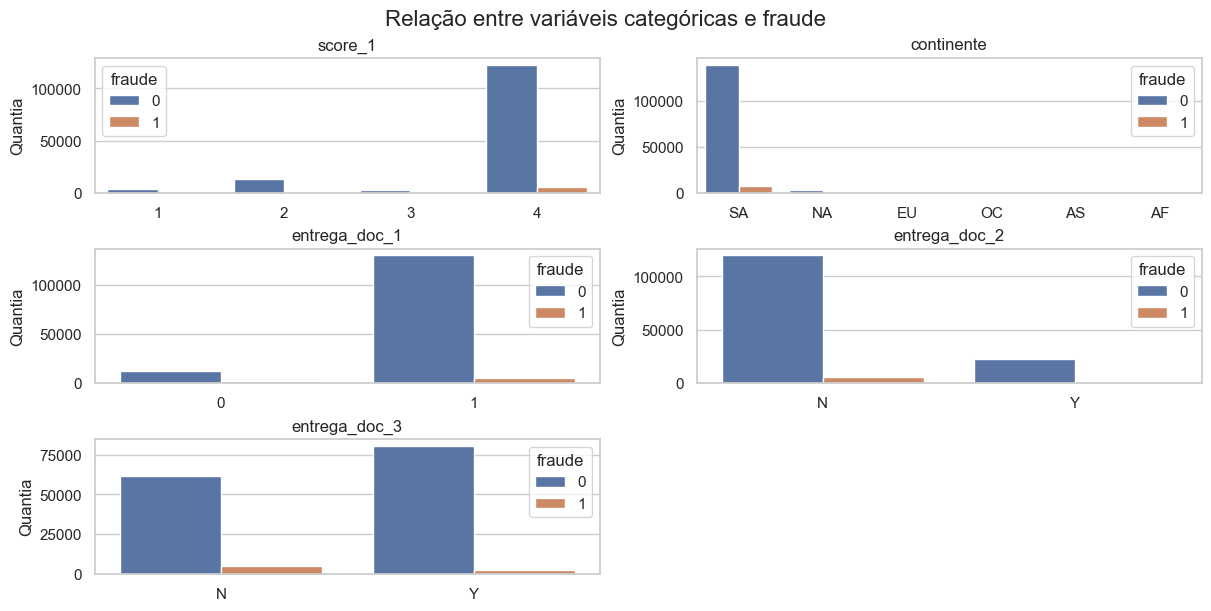

In [56]:
fig, axes = plt.subplots(3, 2, figsize=(12, 6), constrained_layout=True)

for ax, col in zip(axes.flat, df_copy[categorical_columns]):
    sns.countplot(data=df_copy, x=col, hue="fraude", palette="deep", ax=ax)
    ax.set_title(f"{col}")
    ax.set_ylabel("Quantia")
    ax.set_xlabel("")

axes[2][1].axis("off")
plt.suptitle("Relação entre variáveis categóricas e fraude", fontsize=16)
plt.show()

Não conseguimos visualizar um perfil claro para os casos de fraude, vamos tentar utilizar gráficos de barra porém calculando as proporções.

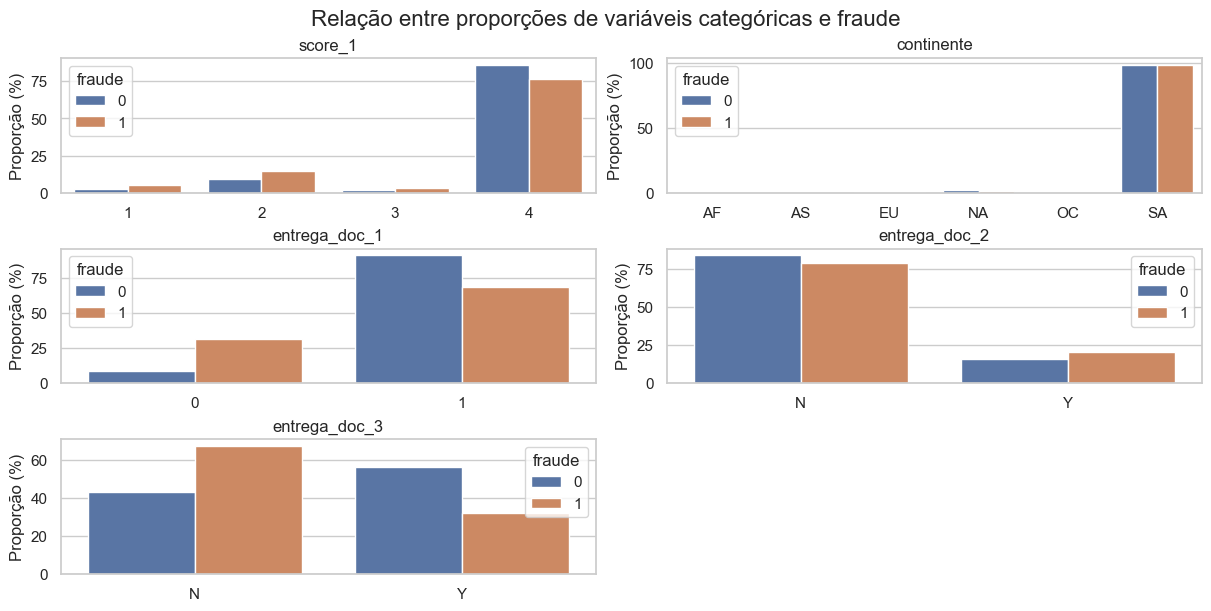

In [57]:
fig, axes = plt.subplots(3, 2, figsize=(12, 6), constrained_layout=True)

for ax, col in zip(axes.flat, df_copy[categorical_columns]):
    temp_df = df_copy.groupby([col, "fraude"]).size().reset_index(name="count")
    temp_df["proporcao_" + col] = temp_df.groupby("fraude")["count"].transform(
        lambda x: x / x.sum() * 100
    )

    sns.barplot(
        data=temp_df,
        x=col,
        y="proporcao_" + col,
        hue="fraude",
        palette="deep",
        ax=ax,
    )
    ax.set_title(f"{col}")
    ax.set_ylabel("Proporção (%)")
    ax.set_xlabel("")

axes[2][1].axis("off")
plt.suptitle(
    "Relação entre proporções de variáveis categóricas e fraude", fontsize=16
)
plt.show()

Utilizando as proporções conseguimos visualizar para as entregas de documentos 1 e 2 um acréscimo na porcentagem de fraudes quando estes não são entregues.

Vamos aplicar o teste Chi-quadrado para verificar a aderência de distribuições a partir de uma tabela de contigência. Temos um $\alpha$ de 5% (0.05) e hipóteses:
 
- Hipótese nula $H_0 \rightarrow$ os grupos não possuem diferença significativa
- Hipótese alternativa $H_a \rightarrow$ os grupos possuem diferença

In [58]:
# Iremos verificar as colunas de produto utilizando teste estatístico
categorical_columns = categorical_columns + [
    "produto",
    "categoria_produto",
    "categoria_produto_reduzida",
]

chi_results = []
for col in categorical_columns:
    contingency_table = pd.crosstab(df_copy[col], df_copy["fraude"])
    chi2_stat, p_value, dof, expected = stats.chi2_contingency(
        contingency_table
    )

    chi_results.append({"Coluna": col, "P-value": p_value})

chi_df = pd.DataFrame(chi_results)
chi_df["Rejeição"] = chi_df["P-value"].apply(
    lambda p: "Rejeitada" if p < alpha else "Não Rejeitada"
)

print(chi_df)

                       Coluna        P-value       Rejeição
0                     score_1  2.371873e-126      Rejeitada
1                  continente   6.230765e-05      Rejeitada
2               entrega_doc_1   0.000000e+00      Rejeitada
3               entrega_doc_2   2.087244e-29      Rejeitada
4               entrega_doc_3   0.000000e+00      Rejeitada
5                     produto   5.200392e-01  Não Rejeitada
6           categoria_produto  2.634339e-112      Rejeitada
7  categoria_produto_reduzida  6.035925e-301      Rejeitada


Temos que apenas a coluna produto a este nível de significância, não rejeitamos que não há diferenças significativas entre os grupos, provavelmente devido a alta cardinalidade de classes. Iremos excluí-la do uso ao nosso modelo. 

### Variáveis de tempo

Vamos analisar as variáveis criadas a partir da coluna de Data. Os gráficos serão de valores absolutos e também em formato de proporção assim como nas categóricas.

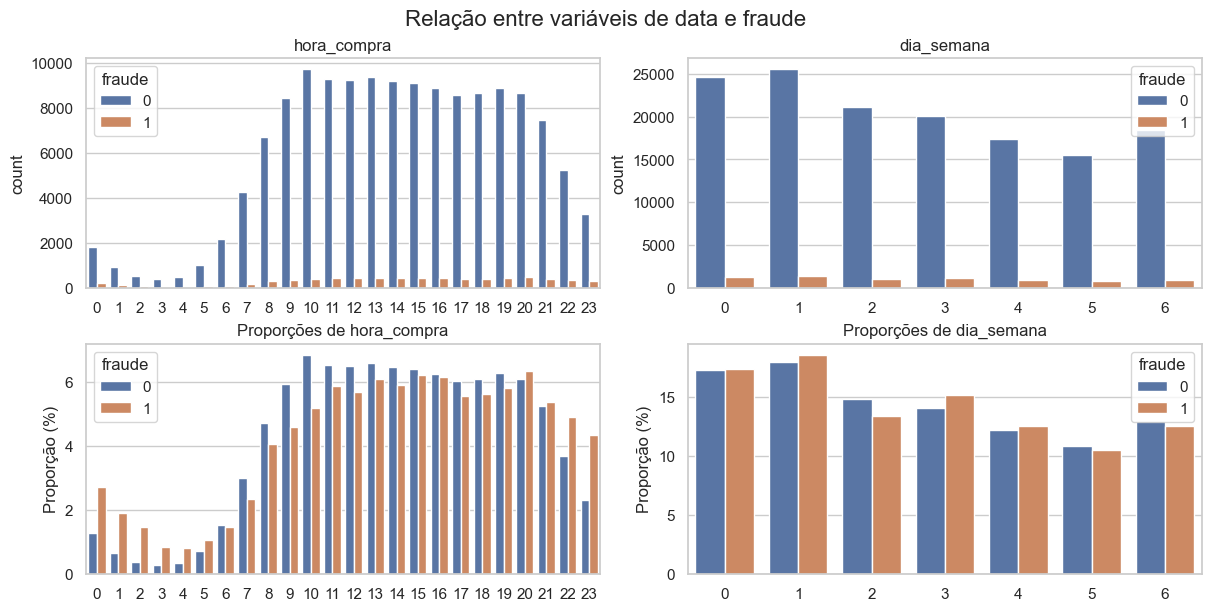

In [59]:
time_variables = ["hora_compra", "dia_semana"]

fig, axes = plt.subplots(2, 2, figsize=(12, 6), constrained_layout=True)

for ax, col in zip(axes.flat[:2], df_copy[time_variables]):
    sns.countplot(data=df_copy, x=col, hue="fraude", palette="deep", ax=ax)
    ax.set_title(f"{col}")
    ax.set_xlabel("")

for ax, col in zip(axes.flat[2:], df_copy[time_variables]):
    temp_df = df_copy.groupby([col, "fraude"]).size().reset_index(name="count")
    temp_df["proporcao_" + col] = (
        temp_df.groupby("fraude")["count"].transform(lambda x: x / x.sum())
        * 100
    )
    sns.barplot(
        data=temp_df,
        x=col,
        y="proporcao_" + col,
        hue="fraude",
        palette="deep",
        ax=ax,
    )
    ax.set_title(f"Proporções de {col}")
    ax.set_ylabel("Proporção (%)")
    ax.set_xlabel("")

# axes[2][1].axis("off")
plt.suptitle("Relação entre variáveis de data e fraude", fontsize=16)
plt.show()

Quando visualizamos o gráfico de proporções das fraudes, vemos que há um aumento das proporções em comparação com os casos legítimos durante a madrugada, a partir das 20 horas até as 6 da manhã.

Vamos aplicar o mesmo teste Chi-quadrado as variáveis de data, mantendo o valor alfa e as hipóteses das variáveis categóricas.

In [60]:
time_chi_results = []
for col in time_variables:
    contingency_table = pd.crosstab(df_copy[col], df_copy["fraude"])
    chi2_stat, p_value, dof, expected = stats.chi2_contingency(
        contingency_table
    )

    time_chi_results.append({"Coluna": col, "P-value": p_value})

time_chi_df = pd.DataFrame(time_chi_results)
time_chi_df["Rejeição"] = time_chi_df["P-value"].apply(
    lambda p: "Rejeitada" if p < alpha else "Não Rejeitada"
)

print(time_chi_df)

        Coluna        P-value   Rejeição
0  hora_compra  5.303029e-163  Rejeitada
1   dia_semana   2.124591e-03  Rejeitada


Rejeitamos ambas as hipóteses nulas, para nossa amostra e este nível de significância os grupos possuem diferença.

In [61]:
def hour_to_period(hour):
    if 6 <= hour < 12:
        return "Manhã"
    elif 12 <= hour < 18:
        return "Tarde"
    elif 18 <= hour < 24:
        return "Noite"
    else:
        return "Madrugada"


df_copy["turno_compra"] = df_copy["hora_compra"].apply(hour_to_period)

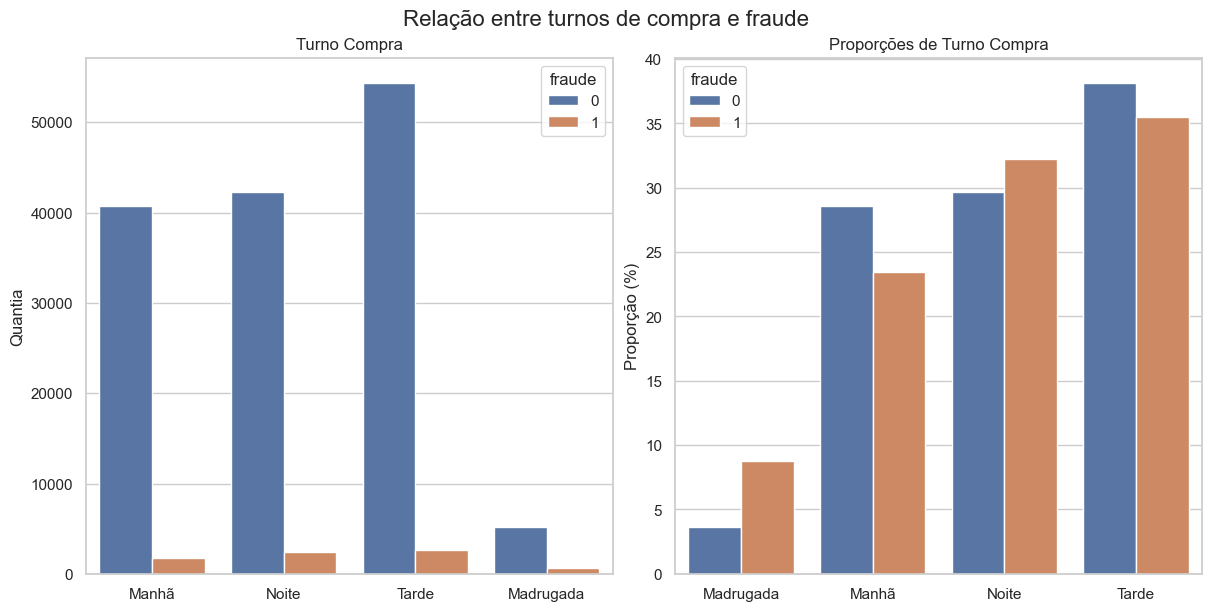

In [62]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6), constrained_layout=True)

sns.countplot(
    data=df_copy, x="turno_compra", hue="fraude", palette="deep", ax=axes[0]
)
axes[0].set_title("Turno Compra")
axes[0].set_xlabel("")
axes[0].set_ylabel("Quantia")

temp_df = (
    df_copy.groupby(["turno_compra", "fraude"])
    .size()
    .reset_index(name="count")
)
temp_df["turno_proporcao"] = (
    temp_df.groupby("fraude")["count"].transform(lambda x: x / x.sum()) * 100
)

sns.barplot(
    data=temp_df,
    x="turno_compra",
    y="turno_proporcao",
    hue="fraude",
    palette="deep",
    ax=axes[1],
)
axes[1].set_title(f"Proporções de Turno Compra")
axes[1].set_ylabel("Proporção (%)")
axes[1].set_xlabel("")

# axes[2][1].axis("off")
plt.suptitle("Relação entre turnos de compra e fraude", fontsize=16)
plt.show()

## Resultados EDA

Sintetizando os resultados da análise realizada neste notebook temos:

- Vamos excluir as variáveis `score_8` e `produto`
- Há variáveis discretas dentre as numéricas
- Podemos aplicar a transformação log as variávels `score_3` e `valor_compra`
- Podemos retirar os outliers relativos a `score_6` (> 483) e `score_5` (< 10)
- A variável `pais` pode ser agrupada em continentes
- Podemos transformar a variável `data_compra` em hora do dia, dia da semana e turno de compra.
- Agrupar as categorias de produto que possuem menos que 3 ocorrências em coluna outros, se torna necessário testarmos com ou sem a adição dessa coluna.